<a href="https://colab.research.google.com/github/pujaroy280/DATA608Story7/blob/main/Puja_Roy_DATA_608_Story_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Story#7: Where Do Strategic Minerals Come From?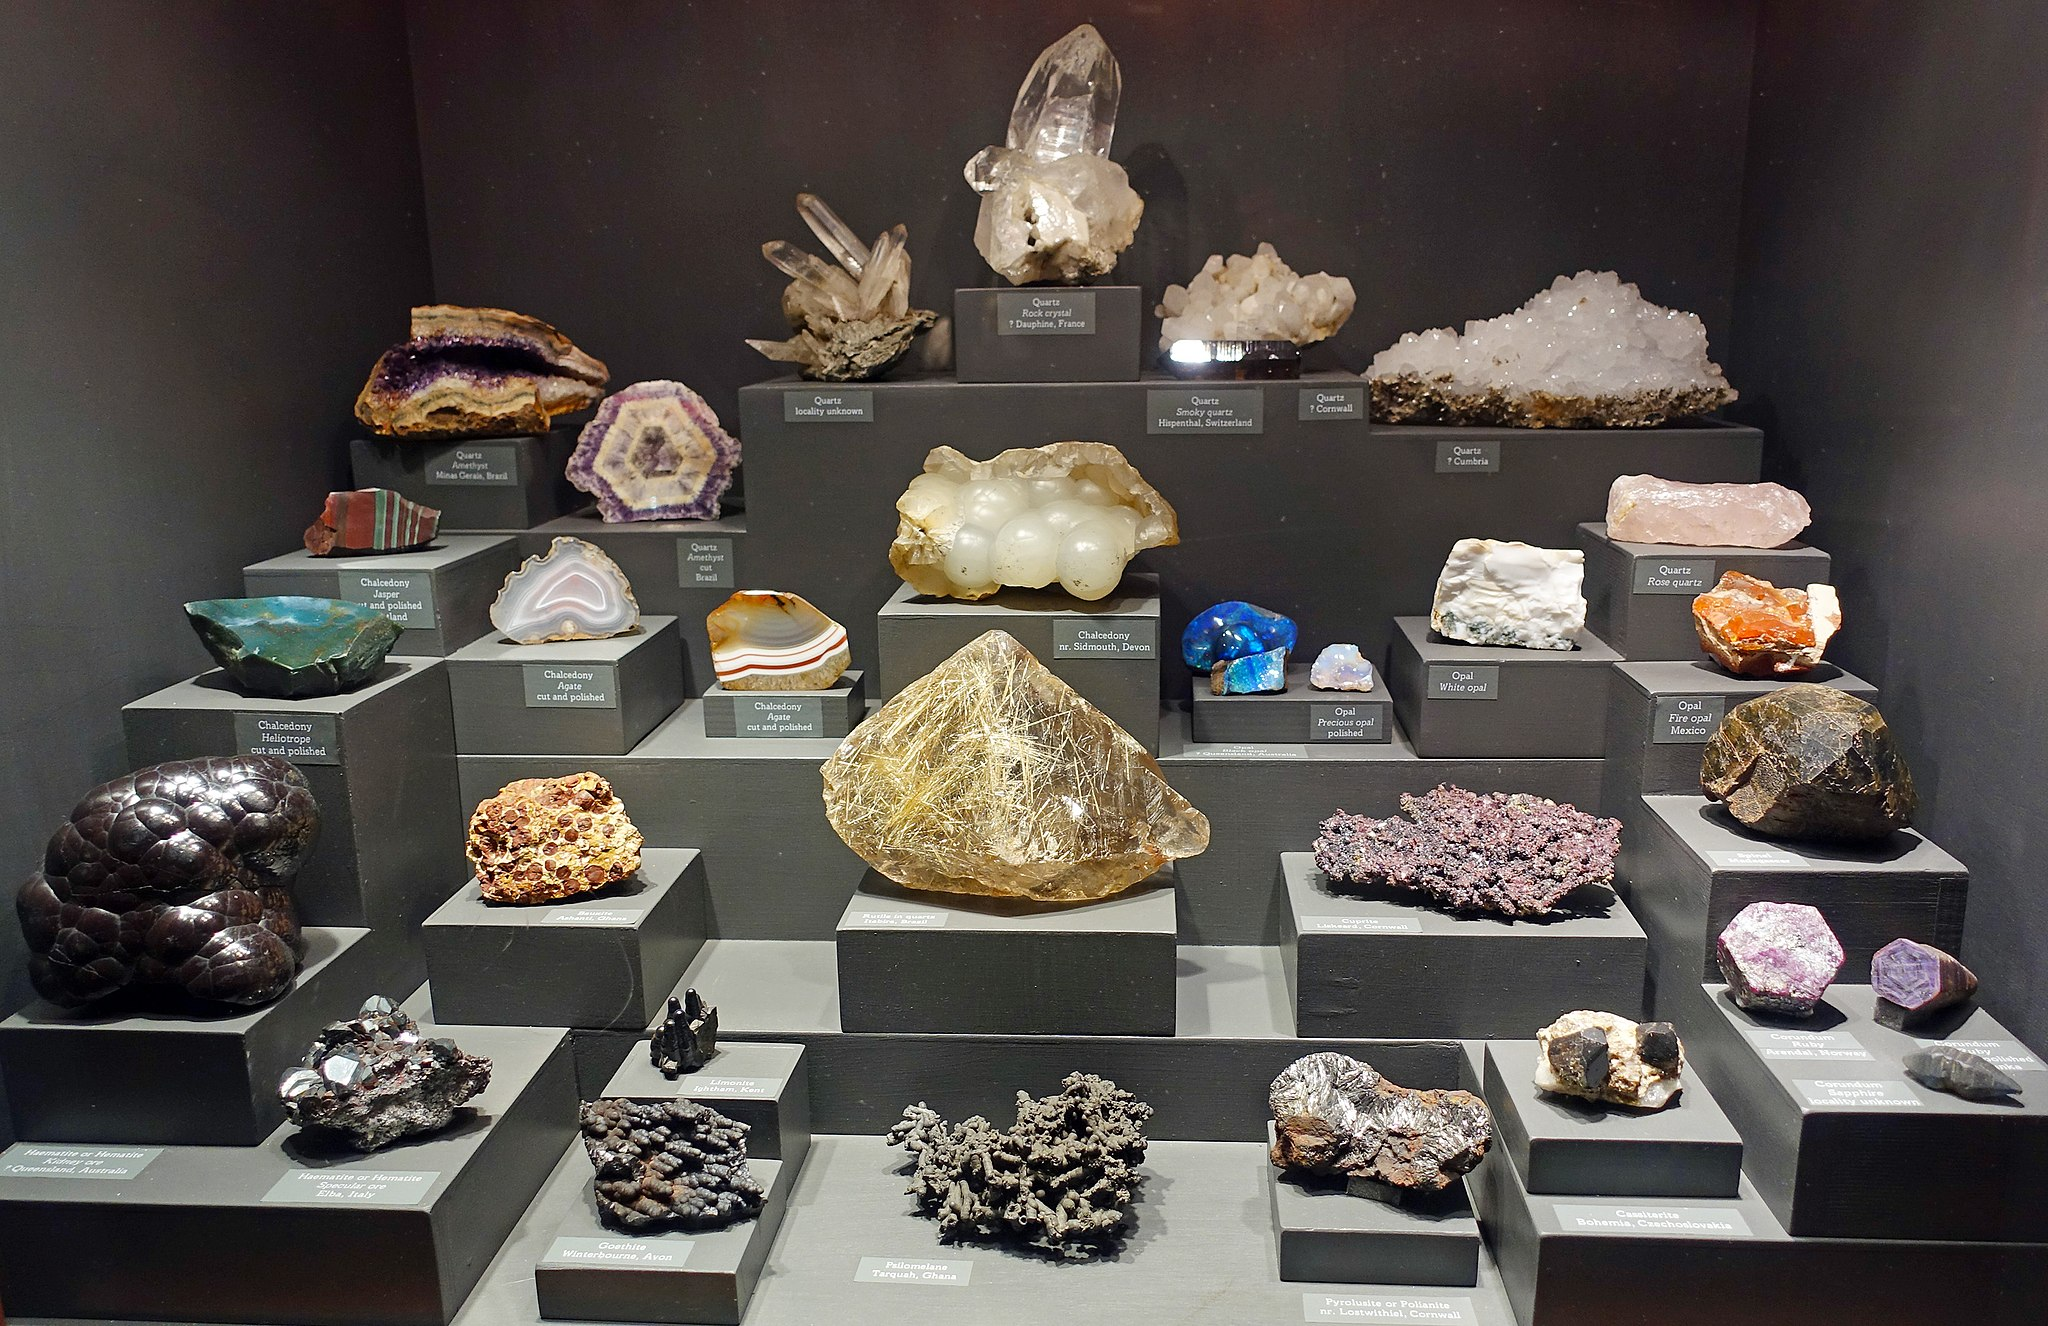**

Pic Credit: https://www.fossilera.com/pages/minerals-crystals-rocks-stones-what-s-the-difference

The US Geological Survey publishes a list of Strategic Minerals ( https://www.usgs.gov/news/national-news-release/us-geological-survey-releases-2022-list-critical-minerals ). Having a secure supply of these minerals is essential to our security and economic prosperity. However many of these minerals are sourced from outside of the US. This assignment is to develop a reference catalog of the source or sources of each of these minerals and a judgement on the reliability of each source under stressed circumstance (e.g. war, economic crisis, etc.)
Notes:

- You will need to identify a source or sources for each of the minerals in the 2022 List of Critical Minerals

- You will need to categorize each source country as an ally, a competitor or a neutral party.

- You will need to develop data visualizations that tell the story of source dependency and shortfall impact.


**Load Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import ListedColormap

**Load the Data**

In [2]:
# Specifying the file path
file_path = "/content/mineral-projected-demand.xlsx"

# Reading the Excel file into a dataframe
minerals_data = pd.read_excel(file_path)
minerals_data

,Table 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,Stated policies scenario,NaN,NaN,NaN,NaN,NaN,Announced pledges scenario,NaN,NaN,NaN,NaN,NaN,Net Zero Emissions by 2050 scenario,NaN,NaN,NaN,NaN,NaN
1,NaN,2022.000000,2025,2030.000000,2035.000000,2040.000000,2045.000000,2050.000000,2025,2030.000000,2035.000000,2040.000000,2045.000000,2050.000000,2025,2030.000000,2035.000000,2040.000000,2045.000000,2050.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Boron,0.158618,0.175778,0.314919,0.287788,0.259729,0.329544,0.408226,0.226241,0.409879,0.475982,0.494596,0.541735,0.643545,0.282352,0.731090,0.728470,0.691595,0.472797,0.746079
4,Cadmium,0.420843,0.420292,0.397562,0.395331,0.411500,0.465976,0.503529,0.497073,0.511277,0.570518,0.560878,0.599139,0.589951,0.770334,1.224040,1.132610,0.954223,0.598829,0.431189
5,Chromium,181.109000,216.958,365.130000,314.491000,427.519000,331.131000,326.113000,267.617,527.804000,521.743000,606.409000,483.201000,557.908000,407.412,851.854000,758.035000,721.065000,464.211000,459.105000
6,Copper,5735.860000,6472.9,9298.250000,9490.560000,9804.580000,10680.900000,10647.500000,7229.46,11363.700000,13702.900000,15100.300000,15896.700000,15717.200000,8310.13,15731.600000,19518.500000,20678.100000,19091.600000,17351.400000
7,Cobalt,68.176500,69.4872,79.424500,83.869900,110.073000,136.270000,145.648000,81.7845,121.603000,168.717000,220.562000,261.829000,295.779000,136.819,205.361000,248.807000,258.523000,285.248000,290.666000
8,Gallium,0.008685,0.010363,0.087645,0.444460,2.557940,2.958140,3.342090,0.012128,0.115736,0.684429,3.892040,4.564670,5.129030,0.016431,0.197053,1.022450,5.531230,4.488590,5.015630
9,Germanium,0.009698,0.009336,0.007551,0.006956,0.006539,0.007635,0.008714,0.011064,0.009733,0.009915,0.008658,0.009247,0.009266,0.017136,0.024107,0.020568,0.015969,0.010519,0.008182


In [3]:
# View the structure of the dataframe
print(minerals_data.info())

# View the first few rows of the dataframe
print(minerals_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Table 1      39 non-null     object 
 1   Unnamed: 1   40 non-null     float64
 2   Unnamed: 2   41 non-null     object 
 3   Unnamed: 3   40 non-null     float64
 4   Unnamed: 4   40 non-null     float64
 5   Unnamed: 5   40 non-null     float64
 6   Unnamed: 6   40 non-null     float64
 7   Unnamed: 7   40 non-null     float64
 8   Unnamed: 8   41 non-null     object 
 9   Unnamed: 9   40 non-null     float64
 10  Unnamed: 10  40 non-null     float64
 11  Unnamed: 11  40 non-null     float64
 12  Unnamed: 12  40 non-null     float64
 13  Unnamed: 13  40 non-null     float64
 14  Unnamed: 14  41 non-null     object 
 15  Unnamed: 15  40 non-null     float64
 16  Unnamed: 16  40 non-null     float64
 17  Unnamed: 17  40 non-null     float64
 18  Unnamed: 18  40 non-null     float64
 19  Unnamed: 1

In [4]:
# Creating dataframes for each mineral
copper_data = pd.DataFrame({
    'Mineral': 'Copper',
    'Category': ["Solar PV", "Wind", "Other low emissions power generation", "Electric vehicles", "Grid battery storage",
                 "Electricity networks", "Hydrogen technologies", "Total clean technologies", "Other uses",
                 "Total demand", "Share of clean technologies in total demand"],
    'Total_Demand': [682, 394, 85, 373, 20, 4182, 0, 5736, None, None, 22]
})

cobalt_data = pd.DataFrame({
    'Mineral': 'Cobalt',
    'Category': ["Low emissions power generation", "Electric vehicles", "Grid battery storage",
                 "Hydrogen technologies", "Total clean technologies", "Other uses",
                 "Total demand", "Share of clean technologies in total demand"],
    'Total_Demand': [0, 65, 4, 0, 68, 103, 171, 40]
})

lithium_data = pd.DataFrame({
    'Mineral': 'Lithium',
    'Category': ["Electric vehicles", "Grid battery storage", "Total clean technologies",
                 "Other uses", "Total demand", "Share of clean technologies in total demand"],
    'Total_Demand': [70, 3, 73, 57, 130, 56]
})

nickel_data = pd.DataFrame({
    'Mineral': 'Nickel',
    'Category': ["Solar PV", "Wind", "Other low emissions power generation", "Electric vehicles",
                 "Grid battery storage", "Hydrogen technologies", "Total clean technologies",
                 "Other uses", "Total demand", "Share of clean technologies in total demand"],
    'Total_Demand': [0, 37, 83, 326, 9, 2, 457, 2477, 2934, 16]
})

neodymium_data = pd.DataFrame({
    'Mineral': 'Neodymium',
    'Category': ["Wind", "Electric vehicles", "Total clean technologies",
                 "Other uses", "Total demand", "Share of clean technologies in total demand"],
    'Total_Demand': [6, 4, 10, 40, 50, 20]
})

# Combine dataframes into a single dataframe
mineral_data = pd.concat([copper_data, cobalt_data, lithium_data, nickel_data, neodymium_data])

# Print the dataframe
print(mineral_data)

      Mineral                                     Category  Total_Demand
0      Copper                                     Solar PV         682.0
1      Copper                                         Wind         394.0
2      Copper         Other low emissions power generation          85.0
3      Copper                            Electric vehicles         373.0
4      Copper                         Grid battery storage          20.0
5      Copper                         Electricity networks        4182.0
6      Copper                        Hydrogen technologies           0.0
7      Copper                     Total clean technologies        5736.0
8      Copper                                   Other uses           NaN
9      Copper                                 Total demand           NaN
10     Copper  Share of clean technologies in total demand          22.0
0      Cobalt               Low emissions power generation           0.0
1      Cobalt                            Electric v

In [5]:
# Extracting the first two columns (Mineral and Category) from the combined dataframe
mineral_category = mineral_data[['Mineral', 'Category']]

# Printing the extracted dataframe
print(mineral_category)

# Creating a table with the Mineral, Category, and Total Demand columns
table = mineral_data[['Mineral', 'Category', 'Total_Demand']]

# Displaying the table
print(table)

      Mineral                                     Category
0      Copper                                     Solar PV
1      Copper                                         Wind
2      Copper         Other low emissions power generation
3      Copper                            Electric vehicles
4      Copper                         Grid battery storage
5      Copper                         Electricity networks
6      Copper                        Hydrogen technologies
7      Copper                     Total clean technologies
8      Copper                                   Other uses
9      Copper                                 Total demand
10     Copper  Share of clean technologies in total demand
0      Cobalt               Low emissions power generation
1      Cobalt                            Electric vehicles
2      Cobalt                         Grid battery storage
3      Cobalt                        Hydrogen technologies
4      Cobalt                     Total clean technologi

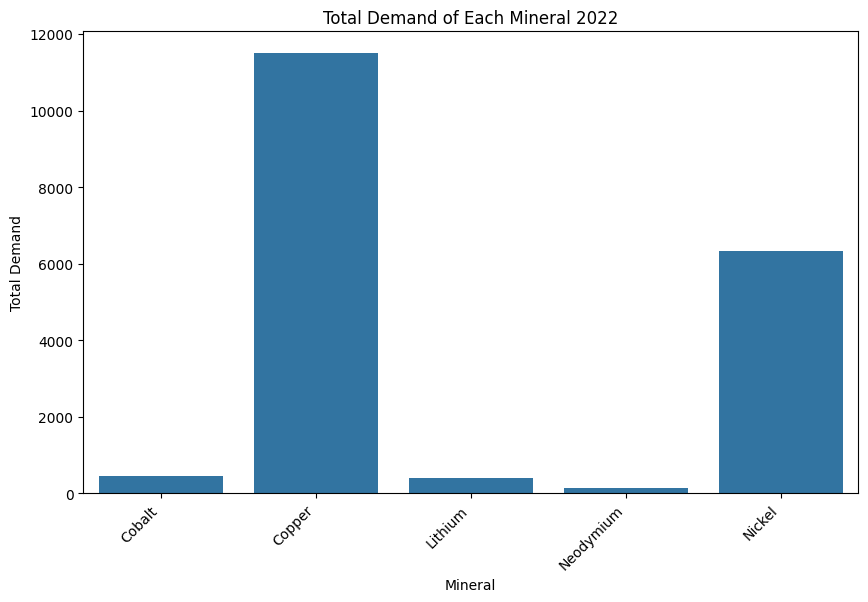

In [6]:
# Aggregate total demand for each mineral
total_demand = mineral_data.groupby('Mineral')['Total_Demand'].sum().reset_index()

# Creating a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Mineral', y='Total_Demand', data=total_demand)
plt.title('Total Demand of Each Mineral 2022')
plt.xlabel('Mineral')
plt.ylabel('Total Demand')
plt.xticks(rotation=45, ha='right')
plt.show()

**During 2022, Copper was the highest demand mineral.**

In [7]:
import pandas as pd

# URL of the dataset
url = "https://raw.githubusercontent.com/pujaroy280/DATA608Story7/main/mineral-samples.csv"

# Read the CSV file from the URL
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())


    LAB_ID PREVIOUS_LAB_ID1 PREVIOUS_LAB_ID2 PREVIOUS_LAB_ID3 FIELD_ID  \
0  C355417              NaN              NaN              NaN   RM0001   
1  C360759              NaN              NaN              NaN   RM0027   
2  C360762              NaN              NaN              NaN   RM0030   
3  C360763              NaN              NaN              NaN   RM0031   
4  C360769              NaN              NaN              NaN   RM0037   

     JOB_ID PREVIOUS_JOB_ID1 PREVIOUS_JOB_ID2 PREVIOUS_JOB_ID3  \
0  MRP11968              NaN              NaN              NaN   
1  MRP12307              NaN              NaN              NaN   
2  MRP12307              NaN              NaN              NaN   
3  MRP12307              NaN              NaN              NaN   
4  MRP12307              NaN              NaN              NaN   

          SUBMITTER  ... Th_ppm_MS_ST Tl_ppm_MS_ST Tm_ppm_MS_ST U_ppm_MS_ST  \
0  Rare Metals Task  ...          0.2         -0.5        -0.05        0.30   


In [8]:
# Mapping countries based on their categories such as an ally, a competitor or a neutral party.

alliance_mapping= {
    'Chile': "Neutral",
    'South Africa': "Ally",
    'Finland': "Ally",
    'Mexico': "Neutral",
    'Indonesia': "Ally",
    'Norway': "Ally",
    'Canada': "Ally",
    'Russia': "Strained Relations",
    'Japan': "Ally",
    'Philippines': "Neutral",
    'Peru': "Neutral",
    'Cuba': "Strained Relations",
    'Australia': "Ally",
    'Burma': "Neutral",
    'Portugal': "Ally",
    'Sweden': "Ally",
    'China': "Strained Relations",
    'Mauritania': "Neutral",
    'Brazil': "Neutral",
    'Argentina': "Neutral",
    'Germany': "Ally",
    'Namibia': "Neutral",
    'Zambia': "Neutral",
    'India': "Neutral",
    'Poland': "Ally",
    'Democratic Republic of Congo': "Neutral",
    'Vietnam': "Neutral",
    'Papua New Guinea': "Neutral",
    'Honduras': "Neutral"
}
# Map relations to color
color_mapping = {
    "Ally": "b",
    "Strained Relations": "r",
    "Neutral": "g"
}

In [9]:
# Get number of mineral samples produced by country
data = df.loc[df.COUNTRY != "United States"]

data = df.groupby("COUNTRY").count()\
    .reset_index()\
    .sort_values("LAB_ID", ascending=False)

data['relations'] = data['COUNTRY'].map(alliance_mapping)
data['relations_color'] = data['relations'].map(color_mapping)

In [10]:
import plotly.graph_objs as go
import plotly.express as px

# Sort the data in descending order by 'LAB_ID'
data_sorted = data.sort_values(by='LAB_ID', ascending=False)

# Create a bar plot using Plotly
fig = px.bar(data_sorted, x="LAB_ID", y="COUNTRY", color='relations',
             labels={'LAB_ID': 'Number of Mineral Samples Produced', 'COUNTRY': 'Country'},
             title='Number of Mineral Samples Produced Internationally',
             hover_name='COUNTRY',
             hover_data={'LAB_ID': True, 'COUNTRY': False},
             width=800, height=800)

fig.update_layout(
    title={
        'text': "Countries that are friends with the United States make more critical minerals <br>than those that aren't. But if relationships change, things could shift.",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font_size=18
)



# Show the plot
fig.show()

In [11]:
# Source Dependency Analysis
source_dependency = df['COUNTRY'].value_counts().reset_index()
source_dependency.columns = ['Country', 'Sample Count']

# Create a bar chart for source dependency
fig1 = px.bar(source_dependency, x='Country', y='Sample Count', title='Source Dependency Analysis <br> United States has the highest sample count compared to other countries',
              labels={'Country': 'Country', 'Sample Count': 'Sample Count'})
fig1.update_layout(xaxis_title='Country', yaxis_title='Sample Count')

# Shortfall Impact Analysis
shortfall_impact = df.groupby('COUNTRY').size().reset_index(name='Sample Count')

# Create a choropleth map for shortfall impact
fig2 = px.choropleth(shortfall_impact, locations='COUNTRY', locationmode='country names', color='Sample Count',
                     title='Shortfall Impact Analysis <br>Countries, except for the United States, exhibit a low sample count, suggesting a potential shortfall in meeting the demand for critical minerals.', labels={'COUNTRY': 'Country', 'Sample Count': 'Sample Count'})
fig2.update_layout(geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'))

# Display the visualizations
fig1.show()
fig2.show()

# **Conclusion**

In summary, this story highlights a concerning trend in global mineral sample counts, with countries other than the United States displaying notably lower counts. This discrepancy suggests a potential shortfall in meeting the demand for critical minerals, especially considering that Copper was identified as the highest-demand mineral in 2022. Addressing this shortfall will likely require concerted efforts to increase mineral exploration and production outside the United States to ensure a stable and reliable supply chain for critical minerals globally.